# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
230825,0.7983,0.0513,0.8862,0.8032,0.1025,0.1343,0.6738,0.5249,0.8887,0.0757,5,5,16,16
205408,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0903,0.0024,0.0439,5,0,13,13
113331,0.1489,0.9351,0.1294,0.0073,0.0024,0.0293,1.7554,0.3931,0.4272,1.2085,5,5,2,2
156006,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0610,0.0024,0.1221,6,0,7,7
420019,0.0024,0.0049,0.0171,0.0024,0.0024,0.0024,0.0049,0.1270,0.0757,0.0122,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [54]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(1536, activation='relu')(visible)
hidden2 = Dense(786, activation='relu')(hidden1)
hidden3 = Dense(384, activation='relu')(hidden2)
hidden4 = Dense(384, activation='relu')(hidden3)
hidden5 = Dense(192, activation='relu')(hidden4)
output = Dense(num_classes, activation='softmax')(hidden5)
model = Model(inputs=visible, outputs=output)

In [55]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_28 (Dense)            (None, 1536)              16896     
                                                                 
 dense_29 (Dense)            (None, 786)               1208082   
                                                                 
 dense_30 (Dense)            (None, 384)               302208    
                                                                 
 dense_31 (Dense)            (None, 384)               147840    
                                                                 
 dense_32 (Dense)            (None, 192)               73920     
                                                                 
 dense_33 (Dense)            (None, 24)                4632

# 2. Compile Network

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [58]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 2s 15ms/step - loss: 1.3669 - accuracy: 0.6513 - val_loss: 0.9931 - val_accuracy: 0.7289
Epoch 2/300
75/75 [==============================] - 1s 10ms/step - loss: 0.8811 - accuracy: 0.7605 - val_loss: 0.7941 - val_accuracy: 0.7801
Epoch 3/300
75/75 [==============================] - 1s 10ms/step - loss: 0.7281 - accuracy: 0.7971 - val_loss: 0.6832 - val_accuracy: 0.8073
Epoch 4/300
75/75 [==============================] - 1s 10ms/step - loss: 0.6502 - accuracy: 0.8173 - val_loss: 0.6240 - val_accuracy: 0.8219
Epoch 5/300
75/75 [==============================] - 1s 10ms/step - loss: 0.5983 - accuracy: 0.8298 - val_loss: 0.5831 - val_accuracy: 0.8328
Epoch 6/300
75/75 [==============================] - 1s 10ms/step - loss: 0.5651 - accuracy: 0.8385 - val_loss: 0.5697 - val_accuracy: 0.8388
Epoch 7/300
75/75 [==============================] - 1s 10ms/step - loss: 0.5295 - accuracy: 0.8480 - val_loss: 0.5366 - val_accuracy: 0.8472
Epoch 

75/75 [==============================] - 1s 10ms/step - loss: 0.2194 - accuracy: 0.9378 - val_loss: 0.2906 - val_accuracy: 0.9178
Epoch 59/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2201 - accuracy: 0.9373 - val_loss: 0.2960 - val_accuracy: 0.9160
Epoch 60/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2208 - accuracy: 0.9370 - val_loss: 0.2873 - val_accuracy: 0.9205
Epoch 61/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2178 - accuracy: 0.9381 - val_loss: 0.2866 - val_accuracy: 0.9186
Epoch 62/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2137 - accuracy: 0.9396 - val_loss: 0.2820 - val_accuracy: 0.9199
Epoch 63/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2115 - accuracy: 0.9398 - val_loss: 0.2794 - val_accuracy: 0.9215
Epoch 64/300
75/75 [==============================] - 1s 10ms/step - loss: 0.2090 - accuracy: 0.9407 - val_loss: 0.2787 - val_accuracy: 0.9222
Epoch 65/300

75/75 [==============================] - 1s 10ms/step - loss: 0.1610 - accuracy: 0.9549 - val_loss: 0.2656 - val_accuracy: 0.9316
Epoch 116/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1680 - accuracy: 0.9531 - val_loss: 0.2678 - val_accuracy: 0.9292
Epoch 117/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1629 - accuracy: 0.9545 - val_loss: 0.2592 - val_accuracy: 0.9325
Epoch 118/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1627 - accuracy: 0.9543 - val_loss: 0.2562 - val_accuracy: 0.9333
Epoch 119/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1589 - accuracy: 0.9557 - val_loss: 0.2611 - val_accuracy: 0.9323
Epoch 120/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1620 - accuracy: 0.9548 - val_loss: 0.2595 - val_accuracy: 0.9324
Epoch 121/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1599 - accuracy: 0.9553 - val_loss: 0.2695 - val_accuracy: 0.9297
Epoch 

Epoch 172/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1338 - accuracy: 0.9628 - val_loss: 0.2664 - val_accuracy: 0.9355
Epoch 173/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1346 - accuracy: 0.9630 - val_loss: 0.2752 - val_accuracy: 0.9346
Epoch 174/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1404 - accuracy: 0.9608 - val_loss: 0.2609 - val_accuracy: 0.9366
Epoch 175/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1347 - accuracy: 0.9628 - val_loss: 0.2677 - val_accuracy: 0.9353
Epoch 176/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1330 - accuracy: 0.9631 - val_loss: 0.2650 - val_accuracy: 0.9369
Epoch 177/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1363 - accuracy: 0.9621 - val_loss: 0.2751 - val_accuracy: 0.9353
Epoch 178/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1487 - accuracy: 0.9587 - val_loss: 0.2746 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1410 - accuracy: 0.9608 - val_loss: 0.2813 - val_accuracy: 0.9373
Epoch 230/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1289 - accuracy: 0.9641 - val_loss: 0.2765 - val_accuracy: 0.9368
Epoch 231/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1257 - accuracy: 0.9652 - val_loss: 0.2809 - val_accuracy: 0.9360
Epoch 232/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1226 - accuracy: 0.9658 - val_loss: 0.2684 - val_accuracy: 0.9399
Epoch 233/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1174 - accuracy: 0.9677 - val_loss: 0.2662 - val_accuracy: 0.9395
Epoch 234/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1170 - accuracy: 0.9678 - val_loss: 0.2673 - val_accuracy: 0.9410
Epoch 235/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1153 - accuracy: 0.9682 - val_loss: 0.2664 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1069 - accuracy: 0.9706 - val_loss: 0.2821 - val_accuracy: 0.9401
Epoch 287/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1079 - accuracy: 0.9700 - val_loss: 0.2829 - val_accuracy: 0.9413
Epoch 288/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1058 - accuracy: 0.9710 - val_loss: 0.2811 - val_accuracy: 0.9398
Epoch 289/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1082 - accuracy: 0.9699 - val_loss: 0.2772 - val_accuracy: 0.9409
Epoch 290/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1066 - accuracy: 0.9707 - val_loss: 0.2873 - val_accuracy: 0.9413
Epoch 291/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1120 - accuracy: 0.9687 - val_loss: 0.2856 - val_accuracy: 0.9404
Epoch 292/300
75/75 [==============================] - 1s 10ms/step - loss: 0.1160 - accuracy: 0.9681 - val_loss: 0.2980 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

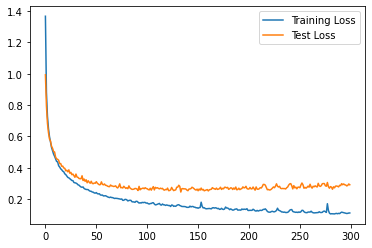

In [59]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

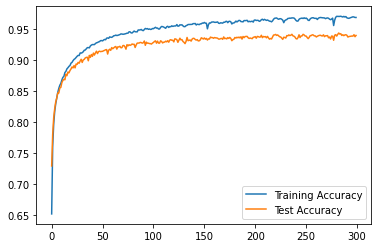

In [60]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 5s 2ms/step - loss: 0.2907 - accuracy: 0.9402


##  4.3 Make Predictions

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions

array([[9.9584228e-01, 7.7861770e-08, 6.8411842e-05, ..., 2.8436830e-12,
        1.9743222e-14, 1.1946634e-13],
       [5.4251852e-29, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.6034463e-25],
       [9.7387302e-01, 9.2133153e-03, 1.0764612e-03, ..., 6.7413050e-05,
        8.5922919e-05, 3.5136425e-06],
       ...,
       [5.0198106e-04, 3.5143162e-15, 1.4232147e-15, ..., 1.0106419e-33,
        6.7839659e-26, 7.6191155e-22],
       [9.8253524e-01, 8.5771381e-04, 1.2527879e-02, ..., 9.6870725e-09,
        4.2545083e-09, 3.9230924e-10],
       [1.3149453e-17, 9.3192329e-19, 1.6458994e-08, ..., 0.0000000e+00,
        6.1870644e-29, 2.7245320e-37]], dtype=float32)